In [ ]:
#Importing the required packages
import math
!pip install pomegranate
!apt install libgraphviz-dev
!pip install pygraphviz
from pomegranate import *

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


1.Set prior probabilities for places as P(T) = P(K) = 0.5 and those for the seasons as P(A) = P(S) = 0.5. The equi-probable states mean that we do not know at which place we are, and which season we are in. Compute the prior probabilities for and determine the most likely fruit, color and shape.

((), (), (0, 1), (2,), (2,))


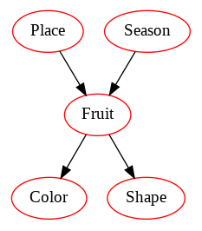

In [ ]:
# Set prior probabilities for places as P(T) = P(K) = 0.5 
Place =DiscreteDistribution( {  'Kashmir': 0.5, 'TamilNadu': 0.5 } )
 
# Set prior probabilities for seasons as P(A) = P(S) = 0.5
Season =DiscreteDistribution( { 'Autumn': 0.5, 'Spring': 0.5 } )
 
#CPT for Fruit
Fruit =ConditionalProbabilityTable(
[[ 'TamilNadu', 'Autumn', 'Apple', 0.3 ],
[ 'TamilNadu', 'Autumn', 'Banana', 0.7 ],
[ 'TamilNadu', 'Spring', 'Apple', 0.1 ],
[ 'TamilNadu', 'Spring', 'Banana', 0.9 ],
[ 'Kashmir', 'Autumn', 'Apple', 0.8 ],
[ 'Kashmir', 'Autumn', 'Banana', 0.2 ],
[ 'Kashmir', 'Spring', 'Apple', 0.4 ],
[ 'Kashmir', 'Spring', 'Banana', 0.6]], [Place, Season])

#CPT for Color
Color = ConditionalProbabilityTable(
[['Banana', 'Red', 0.1],
['Banana', 'Green', 0.4],
['Banana', 'Yellow', 0.5],
['Apple', 'Red', 0.6],
['Apple', 'Green', 0.2],
['Apple', 'Yellow', 0.2]], [Fruit])

#CPT for Shape
Shape = ConditionalProbabilityTable(
[['Banana', 'Round', 0.1],
['Banana', 'Long', 0.9],
['Apple', 'Round', 0.8],
['Apple', 'Long', 0.2]], [Fruit])
 
 #Creating the States for Bayesian Network
d1 = State( Place, name="Place" )
d2 = State( Season, name="Season" )
d3 = State( Fruit, name="Fruit" )
d4 = State(Color, name='Color')
d5 = State(Shape, name='Shape')

#Building the Bayesian Network
network = BayesianNetwork( "Fruits Problem With Bayesian Networks" )
network.add_states(d1, d2, d3, d4, d5)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.add_edge(d3, d4)
network.add_edge(d3, d5)
network.bake()

#Bayesian Network Structure
print(network.structure)

#Bayesian Network Plot
network.plot()

In [ ]:
#initializing the values
P_Kashmir=0
P_TamilNadu=0
P_Autumn=0
P_Spring=0
P_Apple=0
P_Banana=0
P_Red=0
P_Green=0
P_Yellow=0
P_Round=0
P_Long=0
def priorMarginalProb( places, seasons, fruits, colors, shapes):
  probabilityValues = network.predict_proba([[places, seasons, fruits, colors, shapes]]) #calculates the posterior probabilities
  #initializing the values
  P_Kashmir=0
  P_TamilNadu=0
  P_Autumn=0
  P_Spring=0
  P_Apple=0
  P_Banana=0
  P_Red=0
  P_Green=0
  P_Yellow=0
  P_Round=0
  P_Long=0
  #if we are assuming any state like given kashmir, then set its probability value as 1 else calculate its value
  #checking for Places
  if places==None:
    placeProb=json.loads(str(probabilityValues[0][0]))["parameters"][0]
    P_Kashmir=round(placeProb['Kashmir'],2)
    P_TamilNadu=round(placeProb['TamilNadu'],2)
  elif places=='Kashmir':
    P_Kashmir=1
  elif places=='TamilNadu':
    P_TamilNadu=1

#checking for seasons
  if seasons==None:
    seasonProb=json.loads(str(probabilityValues[0][1]))["parameters"][0]
    P_Autumn=round(seasonProb['Autumn'],2)
    P_Spring=round(seasonProb['Spring'],2)
  elif seasons=='Autumn':
    P_Autumn=1
  elif seasons=='Spring':
    P_Spring=1

#checking for fruits
  if fruits==None:
    fruitsProb=json.loads(str(probabilityValues[0][2]))["parameters"][0]
    P_Apple=round(fruitsProb['Apple'],2)
    P_Banana=round(fruitsProb['Banana'],2)
  elif fruits=='Apple':
    P_Apple=1
  elif fruits=='Banana':
    P_Banana=1

#checking for colors
  if colors==None:
    colorProb=json.loads(str(probabilityValues[0][3]))["parameters"][0]
    P_Red=round(colorProb['Red'],2)
    P_Green=round(colorProb['Green'],2)
    P_Yellow=round(colorProb['Yellow'],2)
  elif colors=='Red':
    P_Red=1
  elif colors=='Green':
    P_Green=1
  elif colors=='Yellow':
    P_Yellow=1

#checking for shapes
  if shapes==None:
    shapeProb=json.loads(str(probabilityValues[0][4]))["parameters"][0]
    P_Round=round(shapeProb['Round'],2)
    P_Long=round(shapeProb['Long'],2)
  elif shapes=='Round':
    P_Round=1
  elif shapes=='Long':
    P_Long=1
  
  
  # Printing the values
  print("P(Kashmir): "+str(P_Kashmir))
  print("P(TamilNadu): "+str(P_TamilNadu))
  print()
  print("P(Autumn): "+str(P_Autumn))
  print("P(Spring): "+str(P_Spring))
  print()
  print("P(Apple): "+str(P_Apple))
  print("P(Banana): "+str(P_Banana))
  print()
  print("P(Red): "+str(P_Red))
  print("P(Green): "+str(P_Green))
  print("P(Yellow): "+str(P_Yellow))
  print()
  print("P(Round): "+str(P_Round))
  print("P(Long): "+str(P_Long))
  print()

In [ ]:
def mostLikely( places, seasons, fruits, colors, shapes): #function to create most likely
  return network.predict([[places, seasons, fruits, colors, shapes]])[0] #predict function gives the most likely value

In [ ]:
priorMarginalProb(None,None,None,None,None) #

P(Kashmir): 0.5
P(TamilNadu): 0.5

P(Autumn): 0.5
P(Spring): 0.5

P(Apple): 0.4
P(Banana): 0.6

P(Red): 0.3
P(Green): 0.32
P(Yellow): 0.38

P(Round): 0.38
P(Long): 0.62



In [ ]:
List = mostLikely(None,None,None,None,None)
print("Most Likely Fruit: "+ List[2])
print("Most Likely Color: "+ List[3])
print("Most Likely Shape: "+ List[4])

Most Likely Fruit: Banana
Most Likely Color: Yellow
Most Likely Shape: Long


2. Now assume that you are in Kashmir. Instantiate the “place” node accordingly (set appropriate probability values). Compute the posterior probabilities

In [ ]:
priorMarginalProb('Kashmir',None,None,None,None) #Assuming we are in Kashmir P(Kashmir)=1 , P(TamilNadu)=0

P(Kashmir): 1
P(TamilNadu): 0

P(Autumn): 0.5
P(Spring): 0.5

P(Apple): 0.6
P(Banana): 0.4

P(Red): 0.4
P(Green): 0.28
P(Yellow): 0.32

P(Round): 0.52
P(Long): 0.48



3. Hand compute results of steps 1 and 2 and compare to verify the Bayesian network is correctly implemented.
Solution: Given in Report

4. Check the states of the various nodes. Has any one remained unchanged?  Explain why.
Solution: Given in Report

5. Further (keep the “Kashmir” assumption), assume that you are observing a yellow fruit, round in shape. Instantiate the color and the shape nodes accordingly and compute the posterior probabilities of the unobserved nodes in the network. 


In [ ]:
priorMarginalProb('Kashmir',None,None,'Yellow','Round')#Assuming Place: Kashmir P(Kashmir)=1 , Color: Yellow P(Yellow)=1, Shape: Round P(Round)=1

P(Kashmir): 1
P(TamilNadu): 0

P(Autumn): 0.59
P(Spring): 0.41

P(Apple): 0.83
P(Banana): 0.17

P(Red): 0
P(Green): 0
P(Yellow): 1

P(Round): 1
P(Long): 0



6. What is the most likely fruit and the most likely season you are in?


In [ ]:
List = mostLikely('Kashmir',None,None,'Yellow','Round')
print("Most Likely Fruit: "+ List[2])
print("Most Likely Season: "+ List[1])

Most Likely Fruit: Apple
Most Likely Season: Autumn
